In [1]:
import pandas as pd
import numpy as np

from fit_adversarial import fit_adversarial_regressor, test_model
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("all_vals_race1_interestrate1.csv")
from sklearn.model_selection import train_test_split

df.drop(
    columns=[
        "IsTestData",
        "IsCalibrateData",
        "v1",
        "istestdata2",
        "iscalibratedata2",
    ],
    inplace=True,
)


df["minority"] = (
    (df["race_dum_Black"] == 1)
    | (df["race_dum_Native Am, Alaska, Hawaii"] == 1)
    | (df["race_dum_White hisp"] == 1)
)

C:\Users\bencu\AppData\Local\Temp\ipykernel_43636\3910315459.py:7: DtypeWarning: Columns (101) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("all_vals_race1_interestrate1.csv")


In [2]:
import tensorflow as tf
print(tf.sysconfig.get_build_info())
print("GPUs Available:", tf.config.list_physical_devices("GPU"))

OrderedDict([('cpu_compiler', 'C:/Program Files (x86)/Microsoft Visual Studio/2019/Community/VC/Tools/MSVC/14.29.30133/bin/HostX64/x64/cl.exe'), ('cuda_compute_capabilities', ['sm_35', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'compute_80']), ('cuda_version', '64_112'), ('cudart_dll_name', 'cudart64_112.dll'), ('cudnn_dll_name', 'cudnn64_8.dll'), ('cudnn_version', '64_8'), ('is_cuda_build', True), ('is_rocm_build', False), ('is_tensorrt_build', False), ('msvcp_dll_names', 'msvcp140.dll,msvcp140_1.dll'), ('nvcuda_dll_name', 'nvcuda.dll')])
GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
race_columns = [
    "race_dum_Unknown",
    "race_dum_Asian",
    "race_dum_Black",
    "race_dum_Native Am, Alaska, Hawaii",
    "race_dum_White hisp",
    "race_dum_White_non_hisp",
]

ethnicity_column = "ethnicity_dum_hisp"

features = df.drop(
    columns=["default", "cur_int_rate", "sato", "default_age"] + race_columns + [ethnicity_column],
    axis=1,
)

target = df["cur_int_rate"]


sensitive_features = df[["minority"]].values

In [4]:
import math

features = features.applymap(
    lambda x: x if isinstance(x, (int, float)) and not math.isnan(x) else 0
)

C:\Users\bencu\AppData\Local\Temp\ipykernel_43636\2393365648.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  features = features.applymap(


In [ ]:
X_train, X_val, y_train, y_val, sensitive_train, sensitive_val = train_test_split(
    features, target, sensitive_features, test_size=0.3, random_state=42
)

In [ ]:
mitigator0, scaler0 = fit_adversarial_regressor(
    alpha=0,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha0.pkl",
    epochs=12,
    use_skip_connections=False,
)

Epoch 1/12, Average adversary loss: 0.503017. Average predictor loss: 0.000895
Current alpha 0.0, learning_rate 0.00075
Validation - Epoch 1/12, Adversary Loss: 5.112822, Predictor Loss: 0.000111


KeyboardInterrupt: 

Predictions: [0.04644851 0.03986339 0.04040612 0.04028356 0.04838373]
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0073
Mean Absolute Error: 0.0055
R² Score: 0.7440
{'mean_metrics': {'independence': 0.002793314098102695, 'separation': 0.00012406256604572758, 'sufficiency': 0.0018195078056577267}, 'std_metrics': {'independence': 3.592306265558445e-05, 'separation': 8.561170424303811e-06, 'sufficiency': 2.758459928510056e-05}}


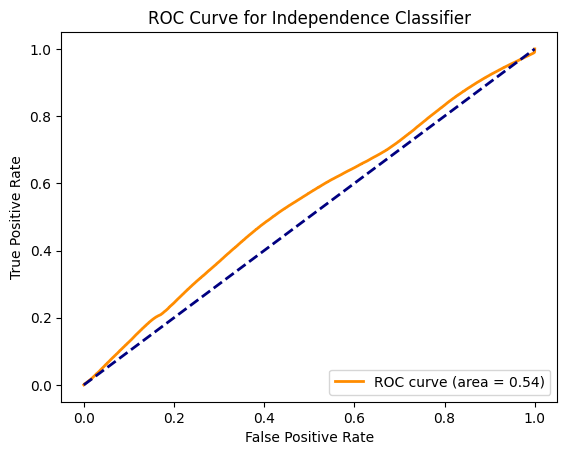

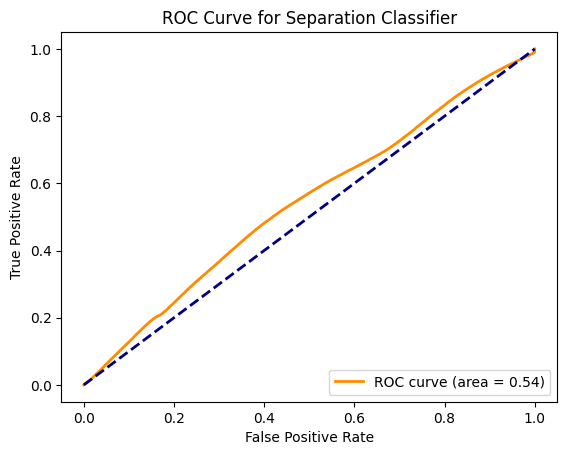

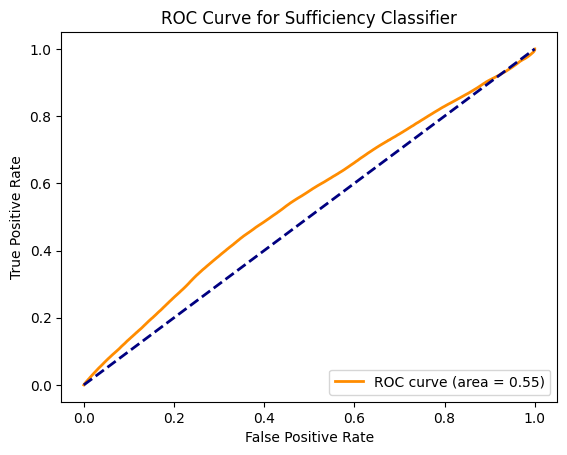

In [ ]:
test_model(mitigator0, scaler0, features, target, sensitive_features)

In [ ]:
mitigator1, scaler1 = fit_adversarial_regressor(
    alpha=1,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha1.pkl",
    epochs=12,
    use_skip_connections=False,
    alpha_decay=0.75,
)

Epoch 1/12, Average adversary loss: 0.506294. Average predictor loss: 0.023305
Current alpha  0.75
Validation - Epoch 1/12, Adversary Loss: 5.144827, Predictor Loss: 0.025958
Epoch 2/12, Average adversary loss: 0.502419. Average predictor loss: 0.006900
Current alpha  0.5625
Validation - Epoch 2/12, Adversary Loss: 4.994276, Predictor Loss: 0.000093
Epoch 3/12, Average adversary loss: 0.502017. Average predictor loss: 0.000782
Current alpha  0.421875
Validation - Epoch 3/12, Adversary Loss: 4.961246, Predictor Loss: 0.000061
Epoch 4/12, Average adversary loss: 0.502035. Average predictor loss: 0.001682
Current alpha  0.31640625
Validation - Epoch 4/12, Adversary Loss: 4.945961, Predictor Loss: 0.000060
Epoch 5/12, Average adversary loss: 0.501911. Average predictor loss: 0.000076
Current alpha  0.2373046875
Validation - Epoch 5/12, Adversary Loss: 4.931588, Predictor Loss: 0.000060
Epoch 6/12, Average adversary loss: 0.501894. Average predictor loss: 0.000065
Current alpha  0.177978515

Predictions: [0.04514354 0.04392442 0.04130113 0.04142627 0.04518935]
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0075
Mean Absolute Error: 0.0057
R² Score: 0.7289
{'mean_metrics': {'independence': 0.004925571963564356, 'separation': 0.06308843287560861, 'sufficiency': 0.06267289607967183}, 'std_metrics': {'independence': 4.771874682529562e-05, 'separation': 0.00021063722974926829, 'sufficiency': 0.00018456156740438611}}


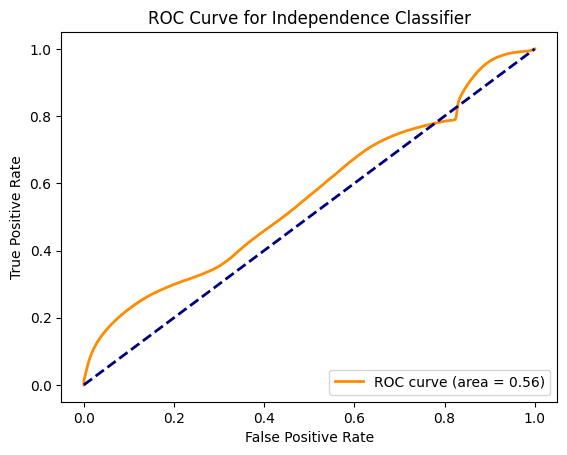

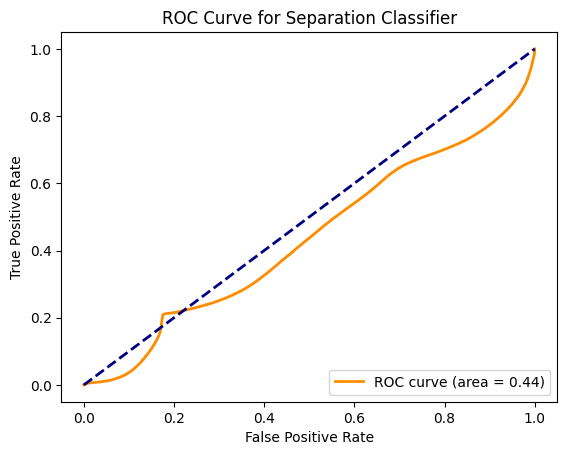

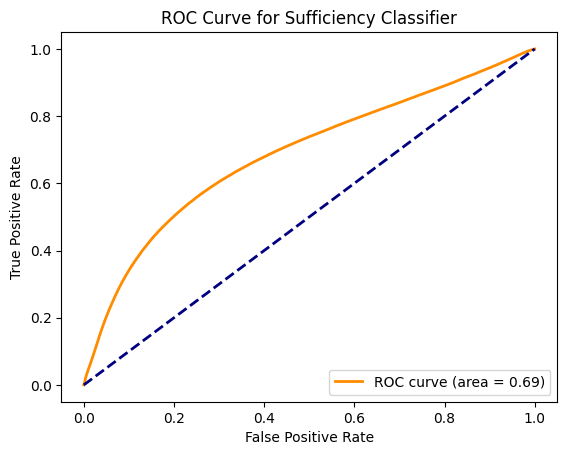

In [ ]:
test_model(mitigator1, scaler1, features, target, sensitive_features)

In [ ]:
mitigator10, scaler10 = fit_adversarial_regressor(
    alpha=10,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha2.pkl",
    epochs=12,
    use_skip_connections=False,
    alpha_decay=0.75,
)

Epoch 1/12, Average adversary loss: 0.507814. Average predictor loss: 0.368953
Current alpha  7.5
Validation - Epoch 1/12, Adversary Loss: 5.024820, Predictor Loss: 0.003187
Epoch 2/12, Average adversary loss: 0.501979. Average predictor loss: 0.001271
Current alpha  5.625
Validation - Epoch 2/12, Adversary Loss: 4.993993, Predictor Loss: 0.000502
Epoch 3/12, Average adversary loss: 0.502127. Average predictor loss: 0.015488
Current alpha  4.21875
Validation - Epoch 3/12, Adversary Loss: 4.949533, Predictor Loss: 0.002299
Epoch 4/12, Average adversary loss: 0.503579. Average predictor loss: 0.314705
Current alpha  3.1640625
Validation - Epoch 4/12, Adversary Loss: 5.000183, Predictor Loss: 0.042654
Epoch 5/12, Average adversary loss: 0.502062. Average predictor loss: 0.003097
Current alpha  2.373046875
Validation - Epoch 5/12, Adversary Loss: 4.973733, Predictor Loss: 0.000101
Epoch 6/12, Average adversary loss: 0.501966. Average predictor loss: 0.001004
Current alpha  1.77978515625
Va

Predictions: [0.03384361 0.04039595 0.03989985 0.03934546 0.03314558]
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0105
Mean Absolute Error: 0.0083
R² Score: 0.4743
{'mean_metrics': {'independence': 0.2606937917420495, 'separation': 0.6877301139646314, 'sufficiency': 0.5795117847551322}, 'std_metrics': {'independence': 0.0002671921412031957, 'separation': 0.00037664879603233715, 'sufficiency': 0.00042564159894912813}}


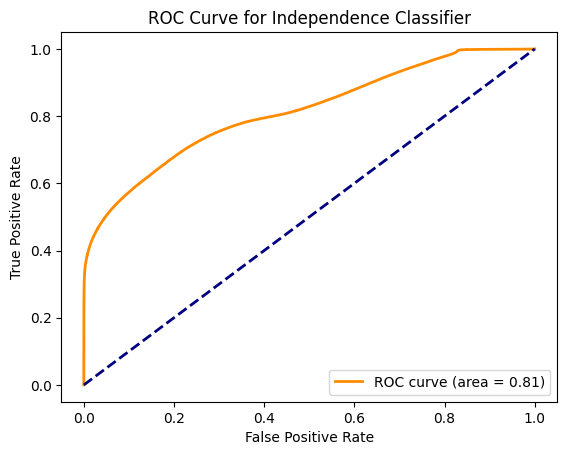

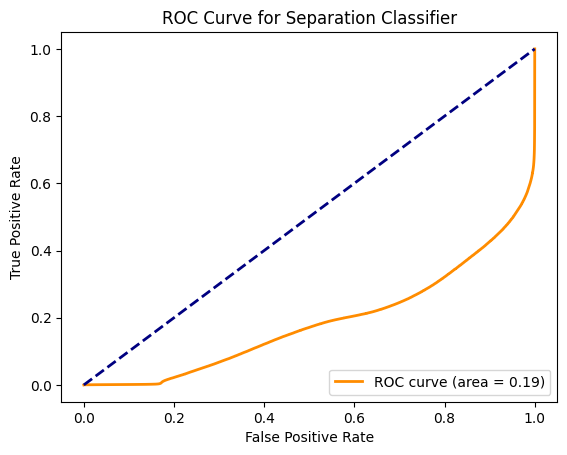

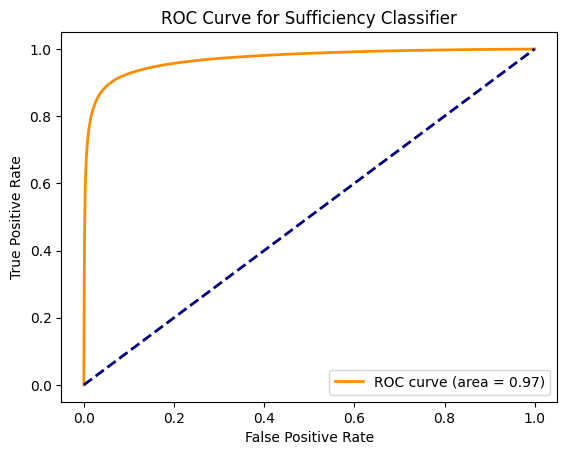

In [ ]:
test_model(mitigator10, scaler10, features, target, sensitive_features)

In [ ]:
mitigator100, scaler100 = fit_adversarial_regressor(
    alpha=100,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha100.pkl",
    epochs=12,
    use_skip_connections=False,
    alpha_decay=0.75,
)

Epoch 1/12, Average adversary loss: 0.510361. Average predictor loss: 3.179692
Current alpha  75.0
Validation - Epoch 1/12, Adversary Loss: 5.040439, Predictor Loss: 0.003056
Epoch 2/12, Average adversary loss: 0.504055. Average predictor loss: 2.286860
Current alpha  56.25
Validation - Epoch 2/12, Adversary Loss: 4.981436, Predictor Loss: 0.006678
Epoch 3/12, Average adversary loss: 0.502086. Average predictor loss: 0.031314
Current alpha  42.1875
Validation - Epoch 3/12, Adversary Loss: 4.988936, Predictor Loss: 0.092313
Epoch 4/12, Average adversary loss: 0.502214. Average predictor loss: 0.040730
Current alpha  31.640625
Validation - Epoch 4/12, Adversary Loss: 4.938213, Predictor Loss: 0.000976
Epoch 5/12, Average adversary loss: 0.502958. Average predictor loss: 0.549156
Current alpha  23.73046875
Validation - Epoch 5/12, Adversary Loss: 4.966658, Predictor Loss: 0.006836
Epoch 6/12, Average adversary loss: 0.501986. Average predictor loss: 0.024064
Current alpha  17.7978515625
V

Predictions: [0.04612911 0.0377503  0.03703845 0.0367831  0.04802036]
Mean Squared Error: 0.0002
Root Mean Squared Error: 0.0142
Mean Absolute Error: 0.0056
R² Score: 0.0426
{'mean_metrics': {'independence': 0.0036444370631428732, 'separation': 0.00011912035718011854, 'sufficiency': 0.0009904571822318203}, 'std_metrics': {'independence': 5.489808282327861e-05, 'separation': 1.002610450545864e-05, 'sufficiency': 4.162787765635601e-05}}


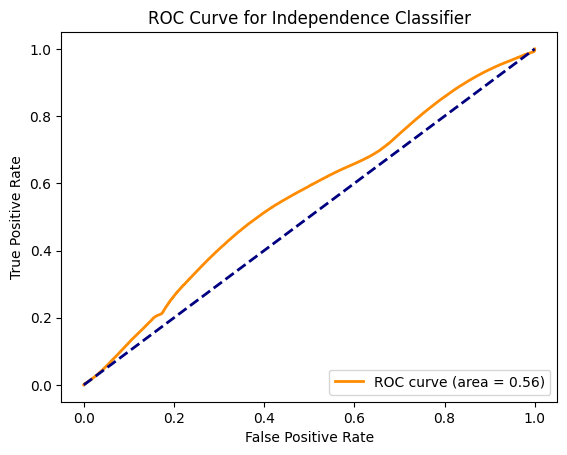

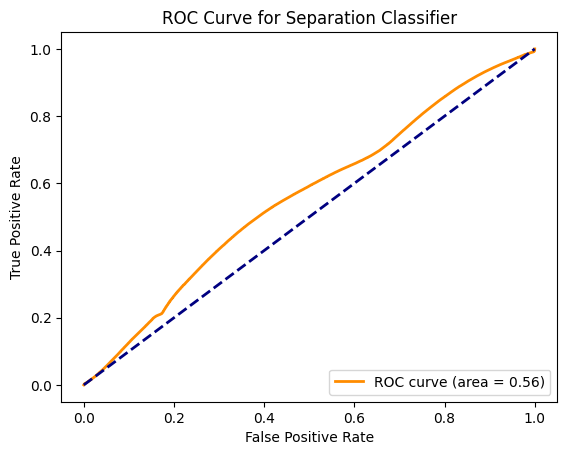

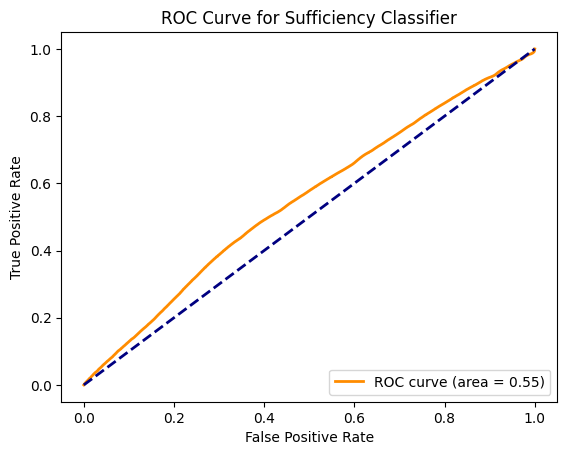

In [ ]:
test_model(mitigator100, scaler100, features, target, sensitive_features)

In [ ]:
mitigator1000, scaler1000 = fit_adversarial_regressor(
    alpha=1000,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha100.pkl",
    epochs=12,
    use_skip_connections=True,
)

Epoch 1/12, Average adversary loss: 0.532855. Average predictor loss: 146.626114
Current alpha  1000
Validation - Epoch 1/12, Adversary Loss: 4.956142, Predictor Loss: 0.069416
Epoch 2/12, Average adversary loss: 0.503900. Average predictor loss: 10.549345
Current alpha  1000
Validation - Epoch 2/12, Adversary Loss: 5.006492, Predictor Loss: 1.297322
Epoch 3/12, Average adversary loss: 0.502257. Average predictor loss: 0.640088
Current alpha  1000
Validation - Epoch 3/12, Adversary Loss: 5.025051, Predictor Loss: 0.001909
Epoch 4/12, Average adversary loss: 0.502541. Average predictor loss: 2.319051
Current alpha  1000
Validation - Epoch 4/12, Adversary Loss: 4.955659, Predictor Loss: 0.108586
Epoch 5/12, Average adversary loss: 0.501927. Average predictor loss: 0.071102
Current alpha  1000
Validation - Epoch 5/12, Adversary Loss: 4.923991, Predictor Loss: 0.001737
Epoch 6/12, Average adversary loss: 0.501864. Average predictor loss: 0.000973
Current alpha  1000
Validation - Epoch 6/12

Predictions: [0.04413493 0.03863822 0.03801261 0.03793469 0.047031  ]
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0078
Mean Absolute Error: 0.0058
R² Score: 0.7072
{'mean_metrics': {'independence': 0.005205284658791066, 'separation': 0.0008590905469469279, 'sufficiency': 0.0001348888832965358}, 'std_metrics': {'independence': 4.942941058260742e-05, 'separation': 2.4037410435583002e-05, 'sufficiency': 8.100696030241662e-06}}


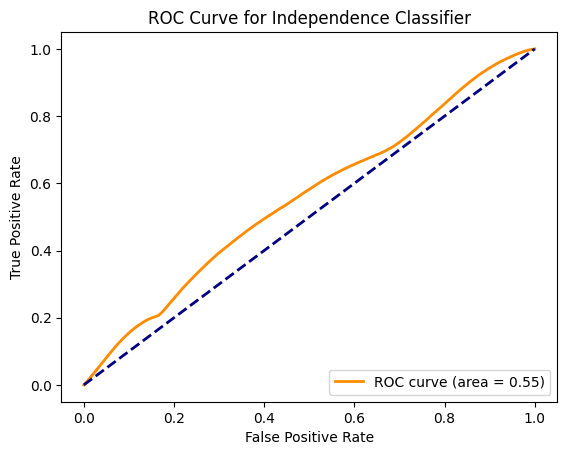

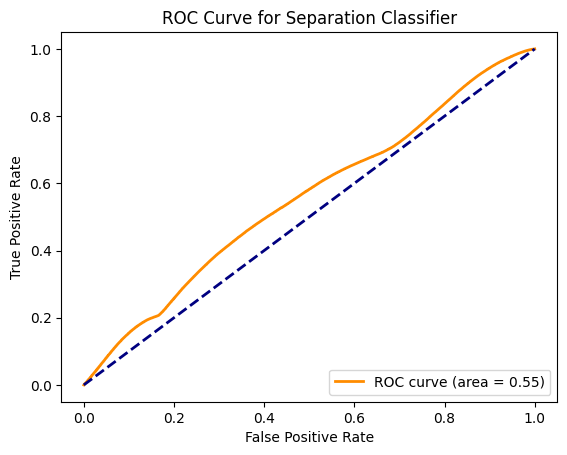

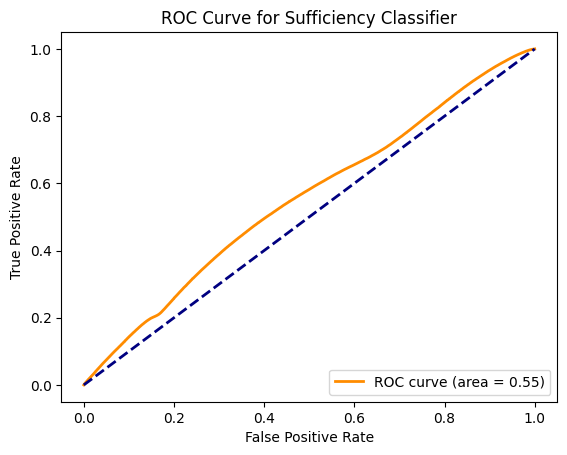

In [ ]:
test_model(mitigator1000, scaler1000, features, target, sensitive_features)

In [ ]:
mitigator10000, scaler10000 = fit_adversarial_regressor(
    alpha=10000,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha100.pkl",
    epochs=20,
)

Epoch 1/20, Average adversary loss: 0.547116. Average predictor loss: 2159.274071
Current alpha  10000
Validation - Epoch 1/20, Adversary Loss: 5.044200, Predictor Loss: 56.631055
Epoch 2/20, Average adversary loss: 0.506261. Average predictor loss: 202.213709
Current alpha  10000
Validation - Epoch 2/20, Adversary Loss: 4.871731, Predictor Loss: 3.927185
Epoch 3/20, Average adversary loss: 0.505082. Average predictor loss: 160.918586
Current alpha  10000
Validation - Epoch 3/20, Adversary Loss: 4.925777, Predictor Loss: 0.715160
Epoch 4/20, Average adversary loss: 0.501873. Average predictor loss: 0.184368
Current alpha  10000
Validation - Epoch 4/20, Adversary Loss: 4.917253, Predictor Loss: 0.007423
Epoch 5/20, Average adversary loss: 0.501865. Average predictor loss: 0.019719
Current alpha  10000
Validation - Epoch 5/20, Adversary Loss: 4.916699, Predictor Loss: 0.000669
Epoch 6/20, Average adversary loss: 0.501863. Average predictor loss: 0.000936
Current alpha  10000
Validation -

In [ ]:
test_model(mitigator10000, scaler10000, features, target, sensitive_features)

Predictions: [nan nan nan nan nan]


ValueError: Input contains NaN.

In [ ]:
mitigator100000, scaler100000 = fit_adversarial_regressor(
    alpha=100000,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha100.pkl",
    epochs=20,
)

In [ ]:
test_model(mitigator100000, scaler100000, features, target, sensitive_features)